In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### nth largest maximum drawdown of a return array

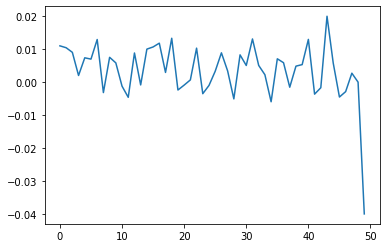

In [2]:
returns = [0.0110136496, 0.0104435606, 0.0090484433, 0.0020184979, 0.007384071, 0.006987376, 0.0129388762, 
           -0.0031716774, 0.0075354966, 0.0058434553, -0.0012221893, -0.0046079802, 0.0088452513, -0.000847902, 
           0.01002096, 0.0106767522, 0.0118291712, 0.0029417718, 0.0133187467, -0.0023922862, -0.0009004302, 
           0.0006750224, 0.0103157863, -0.0035086428, -0.001, 0.0033075856, 0.0088952938, 0.0034042413, 
           -0.0050844372, 0.0082784011, 0.0050556546, 0.0131060258, 0.0050744361, 0.0022493571, -0.0059563636, 
           0.0070841786, 0.0058934202, -0.001541773, 0.0048529025, 0.0053203611, 0.0129711276, -0.0036437494, 
           -0.0017, 0.02, 0.0057976044, -0.0045217829, -0.0028819089, 0.002713111, 0.0, -0.04]

plt.plot(returns)

### 先把return array 转化成price array

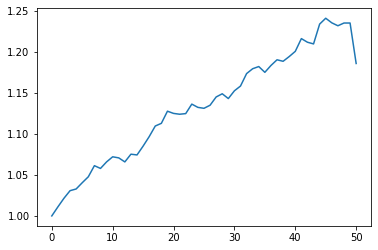

In [3]:
n = len(returns)

prices = [1]

for r in returns:
    prices.append(prices[-1] * (1+r))

plt.plot(prices)

In [43]:
max_sofar = prices[0]
drawdowns = []

for p in prices:
    if p > max_sofar:
        max_sofar = p
    mdd = (p - max_sofar) / max_sofar
    drawdowns.append(mdd)
    
drawdowns

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0031716773999999437,
 0.0,
 0.0,
 -0.001222189299999874,
 -0.005824537675904835,
 0.0,
 -0.0008479019999999254,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0023922862000000807,
 -0.0032905623132584343,
 -0.002617761116528446,
 0.0,
 -0.0035086427999998664,
 -0.004505134157199807,
 -0.001212449674064281,
 0.0,
 0.0,
 -0.005084437199999944,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.005956363599999994,
 0.0,
 0.0,
 -0.0015417729999999607,
 0.0,
 0.0,
 0.0,
 -0.003643749399999975,
 -0.005337555026020003,
 0.0,
 0.0,
 -0.004521782900000133,
 -0.007390660433616666,
 -0.004697601115736397,
 -0.004697601115736397,
 -0.04450969707110702]

### 核心是把这个drawdowns list 按 0 分割成多个组，然后找到每个组的最大MDD；因为MDD不可以重叠
### 第N个大的MDD才需要考虑重叠；如果只是最大MDD则不用

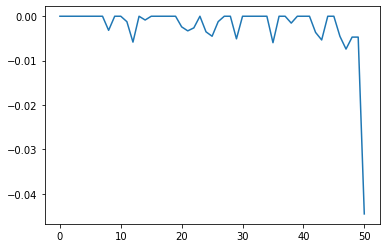

In [42]:
plt.plot(drawdowns)

In [47]:
groups = []
current_group = []

for i in drawdowns:
    
    if i != 0:
        current_group.append(i)
    else:
        if current_group:
            groups.append(current_group)
            current_group = []
if current_group:
    groups.append(current_group)

groups

[[-0.0031716773999999437],
 [-0.001222189299999874, -0.005824537675904835],
 [-0.0008479019999999254],
 [-0.0023922862000000807, -0.0032905623132584343, -0.002617761116528446],
 [-0.0035086427999998664, -0.004505134157199807, -0.001212449674064281],
 [-0.005084437199999944],
 [-0.005956363599999994],
 [-0.0015417729999999607],
 [-0.003643749399999975, -0.005337555026020003],
 [-0.004521782900000133,
  -0.007390660433616666,
  -0.004697601115736397,
  -0.004697601115736397,
  -0.04450969707110702]]

In [49]:
mmd = [min(g) for g in groups]
mmd

[-0.0031716773999999437,
 -0.005824537675904835,
 -0.0008479019999999254,
 -0.0032905623132584343,
 -0.004505134157199807,
 -0.005084437199999944,
 -0.005956363599999994,
 -0.0015417729999999607,
 -0.005337555026020003,
 -0.04450969707110702]

In [51]:
mmd_sort = sorted(mmd)
mmd_sort

[-0.04450969707110702,
 -0.005956363599999994,
 -0.005824537675904835,
 -0.005337555026020003,
 -0.005084437199999944,
 -0.004505134157199807,
 -0.0032905623132584343,
 -0.0031716773999999437,
 -0.0015417729999999607,
 -0.0008479019999999254]

In [52]:
mmd_sort[2]

-0.005824537675904835

# organized answer

In [53]:
n = len(returns)

prices = [1]

for r in returns:
    prices.append(prices[-1] * (1+r))
    
max_sofar = prices[0]
drawdowns = []

for p in prices:
    if p > max_sofar:
        max_sofar = p
    mdd = (p - max_sofar) / max_sofar
    drawdowns.append(mdd)
    
groups = []
current_group = []

for i in drawdowns:
    
    if i != 0:
        current_group.append(i)
    else:
        if current_group:
            groups.append(current_group)
            current_group = []
if current_group:
    groups.append(current_group)
    
mmd = [min(g) for g in groups]
mmd_sort = sorted(mmd)

mmd_sort[2]

-0.005824537675904835

# chatgpt

In [41]:
def calculate_cumulative_returns(returns):
    cumulative_returns = []
    cumulative = 1
    for r in returns:
        cumulative *= (1 + r)
        cumulative_returns.append(cumulative)
    return cumulative_returns

def calculate_drawdowns(returns):
    cumulative_returns = calculate_cumulative_returns(returns)
    peaks = []
    drawdowns = []

    peak = cumulative_returns[0]
    for cr in cumulative_returns:
        if cr > peak:
            peak = cr
        peaks.append(peak)
        drawdowns.append((cr - peak) / peak)
    
    return drawdowns

def nth_largest_max_drawdown(returns, n):
    drawdowns = calculate_drawdowns(returns)
    drawdown_indices = []

    for _ in range(n):
        if all(d == 0 for d in drawdowns):
            break

        # Identify the maximum drawdown and its index
        max_drawdown = min(drawdowns)
        max_drawdown_index = drawdowns.index(max_drawdown)

        # Add the max drawdown index to the list
        drawdown_indices.append(max_drawdown_index)

        # Find the next peak before this max drawdown
        cumulative_returns = calculate_cumulative_returns(returns)
        peak_index = max(range(max_drawdown_index + 1), key=lambda i: cumulative_returns[i])

        # Set the drawdowns of the overlapping period to zero
        for i in range(peak_index, max_drawdown_index + 1):
            drawdowns[i] = 0

    # Get the nth largest drawdown
    if len(drawdown_indices) >= n:
        nth_max_drawdown_index = drawdown_indices[n - 1]
        nth_max_drawdown = abs(calculate_drawdowns(returns)[nth_max_drawdown_index])
        return nth_max_drawdown
    else:
        return None  # Return None if there are not enough non-overlapping drawdowns

nth_largest_max_drawdown(returns, 3)

0.005824537675904835